# 02.3 Predict if a tumor is benign or maligant

In [1]:
#Is this a classification or regression problem ?

from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

cancer = load_breast_cancer()

X = cancer.data
y = cancer.target
df = pd.DataFrame(X, columns=cancer.feature_names)
print(f"Shape of dataframe {df.shape}")



Shape of dataframe (569, 30)


In [2]:
features = ['radius error', 'texture error', 'concave points error',
            'symmetry error', 'worst texture', 'worst smoothness',
            'worst symmetry']
df = df[features] # select just these features
print("target[0:30] =", y[0:30]) # show 30 values of malignant/benign target
df

target[0:30] = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]


,radius error,texture error,concave points error,symmetry error,worst texture,worst smoothness,worst symmetry
0,1.0950,0.9053,0.01587,0.03003,17.33,0.16220,0.4601
1,0.5435,0.7339,0.01340,0.01389,23.41,0.12380,0.2750
2,0.7456,0.7869,0.02058,0.02250,25.53,0.14440,0.3613
3,0.4956,1.1560,0.01867,0.05963,26.50,0.20980,0.6638
4,0.7572,0.7813,0.01885,0.01756,16.67,0.13740,0.2364
...,...,...,...,...,...,...,...
564,1.1760,1.2560,0.02454,0.01114,26.40,0.14100,0.2060
565,0.7655,2.4630,0.01678,0.01898,38.25,0.11660,0.2572
566,0.4564,1.0750,0.01557,0.01318,34.12,0.11390,0.2218
567,0.7260,1.5950,0.01664,0.02324,39.42,0.16500,0.4087


In [3]:
# Create train test split, with 15% data reserved from testing.
from sklearn.model_selection import train_test_split
#  one line code here.
featureNp=np.array(features)
X_train, X_test, y_train, y_test = train_test_split(df,y, test_size=0.15) 
print(len(y_train))
print(X_test)


483
     radius error  texture error  concave points error  symmetry error  \
310        0.1601         1.4300              0.007638         0.02349   
50         0.4062         1.2100              0.007445         0.02406   
395        0.1504         1.6850              0.009155         0.01719   
223        0.3473         0.9209              0.008637         0.01772   
52         0.2273         0.6329              0.008000         0.01996   
..            ...            ...                   ...             ...   
476        0.3478         1.0180              0.013500         0.01610   
329        0.5706         1.4570              0.011860         0.04022   
489        0.2473         0.5679              0.005297         0.01961   
254        0.5959         0.6342              0.012670         0.01365   
312        0.3265         0.6594              0.010690         0.01731   

     worst texture  worst smoothness  worst symmetry  
310          26.55            0.1223          0.3487

In [4]:
# Create a RandomForestClassifier since this is a classification problem.
from sklearn.ensemble import RandomForestClassifier
# one line of code here.
cl=RandomForestClassifier(n_estimators=300)
# Fit your model.
# one line of code here.
cl.fit(X_train, y_train)
validation_e = cl.score(X_test, y_test)
print(f"{validation_e*100:.2f}% correct")

93.02% correct


In [5]:
# Calculate the feature importances.
# 3 lines of code here.
from rfpimp import *

I =  importances(cl, X_test, y_test)
print(I)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


                      Importance
Feature                         
radius error            0.139535
worst texture           0.104651
worst smoothness        0.034884
worst symmetry          0.034884
texture error           0.011628
symmetry error          0.000000
concave points error   -0.011628


In [6]:
from sklearn.datasets import load_breast_cancer
>>> data = load_breast_cancer()
>>> 



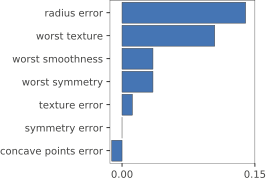

In [7]:
plot_importances(I, color='#4575b4', vscale=1.8)

In [8]:
I = importances(cl, df_test, y_test,
                features=['radius error', 'texture error', 'concave points error',
            'symmetry error', 'worst texture', 'worst smoothness',
            'worst symmetry'])
plot_importances(I, color='#4575b4', vscale=1.8)

NameError: name 'df_test' is not defined